# Exercise 6 - Multiple Linear Regression

In this exercise we will investigate the use of more than one different type of variable in the linear model to produce the median value of owner-occupied homes.  In multiple linear regression we defined the model as:

$$ y = ax_1 + bx_2 + cx_3 + d$$

Where:
* x_1 could represent the average crime rate per capita
* x_2 could represent the average number of rooms in the home
* x_3 could represent the proportion of homes build before 1940
* y is the median value of the owner-occupied homes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('housing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


Where the columns are:

* **CRIM** per capita crime rate by town
* **ZN** proportion of residential land zoned for lots over 25 000 sq. ft.
* **INDUS** the proportion of non-reatil business acres per town
* **CHAS** Charles River dummy variable (=1 if tract bounds river, otherwise 0)
* **NOX** Nitric oxides concentration (parts per 10 million)
* **RM** average number of rooms per dwelling
* **AGE** proportion of owner-occuped units built prior to 1940
* **DIS** weights distances to 5 Boston employment centres
* **RAD** index of accessibility to radial highways
* **TAX** full-value property-tax rate for \$10k
* **PTRATIO** pupil-teacher ratio by town
* **LSTAT** % lower status of the population
* **MEDV** median value of owner-occupied homes in $1000's.

We will select the columns *RM* and *AGE* to predict *MEDV*

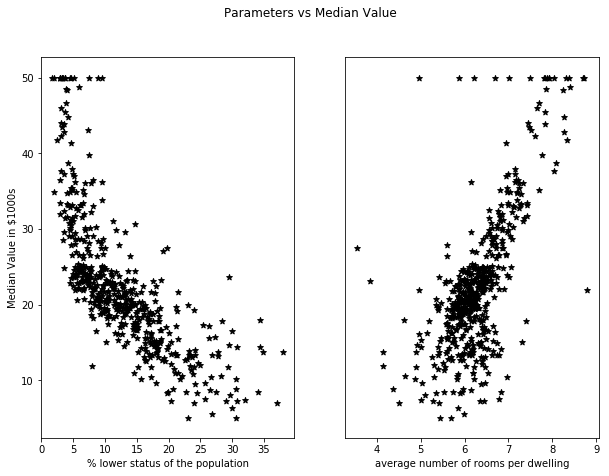

In [3]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Parameters vs Median Value')
ax1 = fig.add_subplot(121)
ax1.scatter(df.LSTAT, df.MEDV, marker='*', c='k');
ax1.set_xlabel('% lower status of the population')
ax1.set_ylabel('Median Value in $1000s')
ax2 = fig.add_subplot(122, sharey=ax1)
ax2.scatter(df.RM, df.MEDV, marker='*', c='k');
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('average number of rooms per dwelling');

Both of these parameters provide some evidence of a linear relationship between the parameter and the median value, perhaps we can use one or both of these values.  What is the performance of the model using the percentage lower status of the population versus median value:

In [4]:
model = LinearRegression()
model.fit(df.LSTAT.values.reshape((-1, 1)), df.MEDV.values.reshape((-1, 1)))
model.score(df.LSTAT.values.reshape((-1, 1)), df.MEDV.values.reshape((-1, 1)))

0.5441462975864797

or the average number of rooms?

In [5]:
model.fit(df.RM.values.reshape((-1, 1)), df.MEDV.values.reshape((-1, 1)))
model.score(df.RM.values.reshape((-1, 1)), df.MEDV.values.reshape((-1, 1)))

0.4835254559913343

what if we use multiple linear regression combining LSTAT and RM into one model?

In [6]:
model.fit(df[['LSTAT', 'RM']], df.MEDV.values.reshape((-1, 1)))
model.score(df[['LSTAT', 'RM']], df.MEDV.values.reshape((-1, 1)))

0.6385616062603403

We can see here that the multiple linear regression model outperformed both the individual parameters with an improved R-squared values